Target variable is the price at which the house was sold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from functions import *

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date'], inplace = True)

In [3]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [4]:
df.isnull().mean()

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


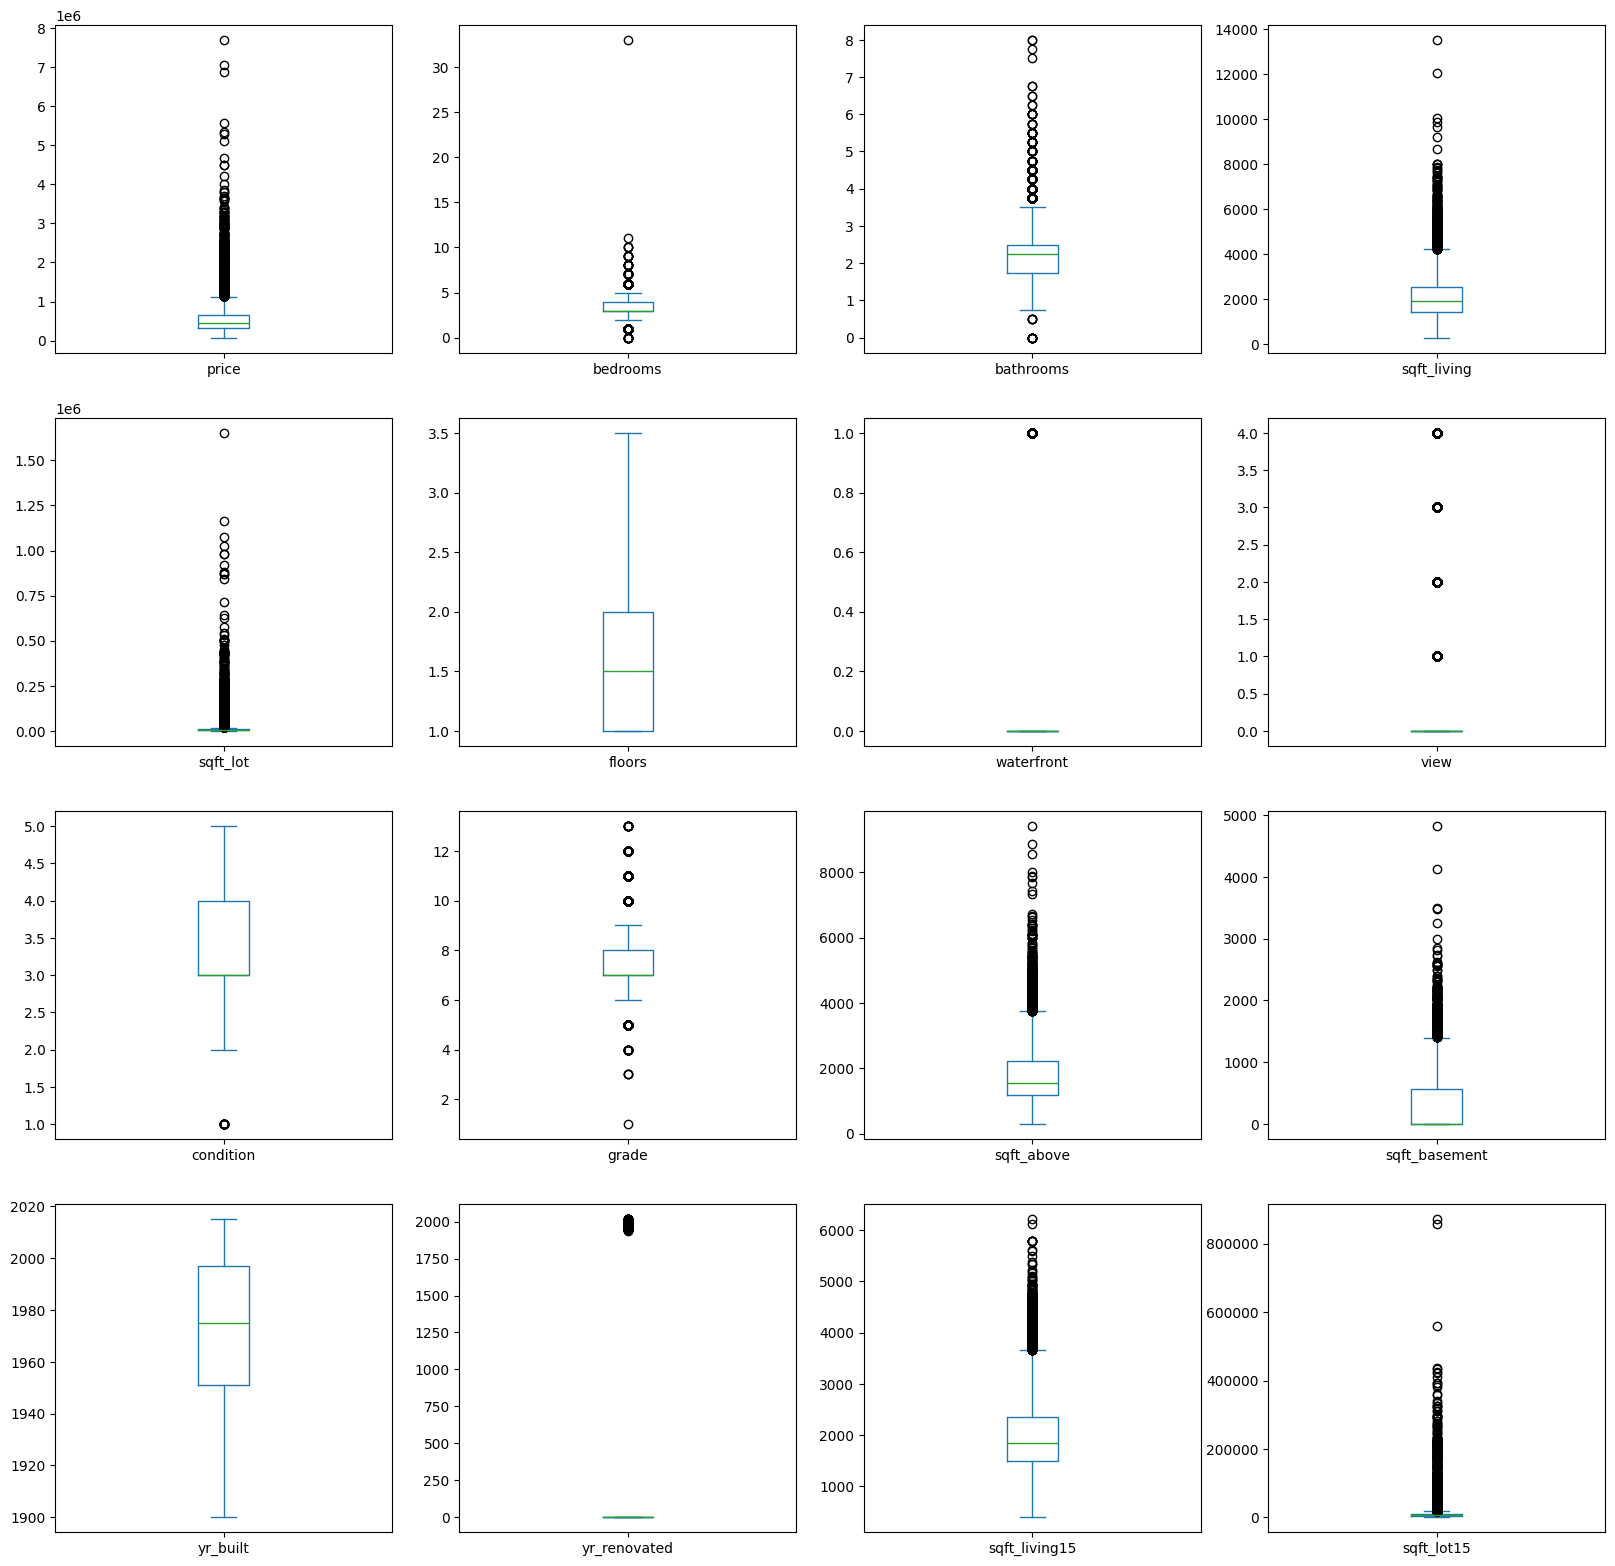

In [6]:
boxPlotAll(df)

In [7]:
find_outliers(df)


(array([    0,     0,     0, ..., 21610, 21611, 21612]),
 array([ 0,  4, 15, ...,  0,  0,  0]))

In [8]:
y = df["price"]
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']]
X['basement'] = 0 # by default no basement 
X.loc[ X.sqft_basement > 0 , 'basement'] = 1 # except when the surface is not zero

X['renovated'] = 0 # by default no renovation 
X.loc[ X.yr_renovated > 0 , 'renovated'] = 1 # except when the year of renovation is not zero
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,basement,renovated
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,0


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [10]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,basement,renovated
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.161934,0.005742,0.0,0.0
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.222165,0.008027,1.0,1.0
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.399415,0.008513,0.0,0.0
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.165376,0.004996,1.0,0.0
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.241094,0.007871,0.0,0.0


In [11]:

lr_model_sqftliving = LinearRegression()
x_feature = pd.DataFrame(X["sqft_living"])
# type(x_feature)
lr_model_sqftliving.fit(x_feature, y)
lr_model_sqftliving.coef_
lr_model_sqftliving.intercept_
predicted = lr_model_sqftliving.predict(x_feature)
regression_results(y, predicted)

lr_model_sqftliving.coef_


explained_variance:  0.4929
r2:  0.4929
MAE:  173688.2734
MSE:  68351286833.0398
RMSE:  261440.7903


array([3718262.27464118])

In [12]:

lr_model_sqftliving = LinearRegression()
x_feature = pd.DataFrame(X["grade"])
# type(x_feature)
lr_model_sqftliving.fit(x_feature, y)
lr_model_sqftliving.coef_
lr_model_sqftliving.intercept_
predicted = lr_model_sqftliving.predict(x_feature)
regression_results(y, predicted)

lr_model_sqftliving.coef_

explained_variance:  0.4455
r2:  0.4455
MAE:  175179.0251
MSE:  74737618184.6968
RMSE:  273381.8176


array([2501490.74950069])

In [13]:
lr_model_sqftliving = LinearRegression()
x_feature = pd.DataFrame(X[["sqft_living","grade"]])
# type(x_feature)
lr_model_sqftliving.fit(x_feature, y)
lr_model_sqftliving.coef_
lr_model_sqftliving.intercept_
predicted = lr_model_sqftliving.predict(x_feature)
regression_results(y, predicted)

lr_model_sqftliving.coef_

explained_variance:  0.5345
r2:  0.5345
MAE:  164569.3833
MSE:  62737973366.6659
RMSE:  250475.4945


array([2443567.72738575, 1182657.57766201])

In [14]:
predictors = ['bedrooms', 'bathrooms', 'floors']

lr_model = LinearRegression()
x_feature = pd.DataFrame(X[predictors])
# type(x_feature)
lr_model.fit(x_feature, y)
lr_model.coef_
lr_model.intercept_
predicted = lr_model.predict(x_feature)
regression_results(y, predicted)

lr_model.coef_

explained_variance:  0.2777
r2:  0.2777
MAE:  203182.8647
MSE:  97350922593.988
RMSE:  312011.0937


array([ 660804.56275136, 1907691.45412953,   -4343.67982785])

In [15]:
predictors = ['bedrooms', 'bathrooms', 'floors','sqft_basement', 'yr_renovated']

lr_model = LinearRegression()
x_feature = pd.DataFrame(X[predictors])
# type(x_feature)
lr_model.fit(x_feature, y)
lr_model.coef_
lr_model.intercept_
predicted = lr_model.predict(x_feature)
regression_results(y, predicted)

lr_model.coef_

explained_variance:  0.3248
r2:  0.3248
MAE:  197724.132
MSE:  90995906784.078
RMSE:  301655.2781


array([ 204450.51583951, 1485351.70524504,  195624.07645562,
        921399.96239855,  164294.91736274])

In [16]:
predictors = ['bedrooms', 'bathrooms', 'floors','sqft_basement', 'yr_renovated','basement', 'renovated']

lr_model = LinearRegression()
x_feature = pd.DataFrame(X[predictors])
# type(x_feature)
lr_model.fit(x_feature, y)
lr_model.coef_
lr_model.intercept_
predicted = lr_model.predict(x_feature)
regression_results(y, predicted)

lr_model.coef_

explained_variance:  0.3326
r2:  0.3326
MAE:  197081.0012
MSE:  89948741823.7179
RMSE:  299914.5575


array([   52336.60407871,  1468926.65042704,   189588.53480096,
        1445140.79699132,  1781028.86436496,  -116852.60560221,
       -1603683.33930222])

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]

seed = 8

scaler = MinMaxScaler(feature_range=(0,1))
# standardscaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors],
    scaled_df['price'],
    test_size=0.33,
    random_state=seed)

model = KNeighborsRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("score: ", mean_absolute_error(y_test, predictions))

print(predictions)

score:  0.021071248493150056
[0.04123148 0.05573508 0.02455082 ... 0.05994754 0.10643934 0.02352525]


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]

seed = 8

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_df[predictors],
    scaled_df['price'],
    test_size=0.33,
    random_state=seed)

model = KNeighborsRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("score: ", mean_absolute_error(y_test, predictions))

score:  0.42037161614647645
